In [1]:
import numpy as np
import os
import pandas

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.callbacks import ModelCheckpoint 
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import model_from_json
from keras.constraints import maxnorm
from keras.optimizers import SGD 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from config import csv_config as config
dataset_path = config.DATASET_PATH
hdf5_path = config.DATASET_HDF5_PATH
hdf5_in_sd_path = config.DATASET_IN_SD_HDF5_PATH
hdf5_out_sd_path = config.DATASET_OUT_SD_HDF5_PATH

In [3]:
seed = 7
np.random.seed(seed)

In [4]:
dataset = pandas.read_csv(dataset_path)

In [5]:
fields = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for field in fields :
    print('field %s : num 0-entries: %d' % (field, len(dataset.loc[ dataset[field] == 0, field ])))

field Glucose : num 0-entries: 5
field BloodPressure : num 0-entries: 35
field SkinThickness : num 0-entries: 227
field Insulin : num 0-entries: 374
field BMI : num 0-entries: 11


In [6]:
from helpers import CSVDatasetProcessor
data_processor =  CSVDatasetProcessor(dataset, fields)

In [7]:
data_processor.zero_to_median()

Field: Glucose; fixed 5 entries with value: 117.000
Field: BloodPressure; fixed 35 entries with value: 72.000
Field: SkinThickness; fixed 227 entries with value: 29.000
Field: Insulin; fixed 374 entries with value: 125.000
Field: BMI; fixed 11 entries with value: 32.300


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

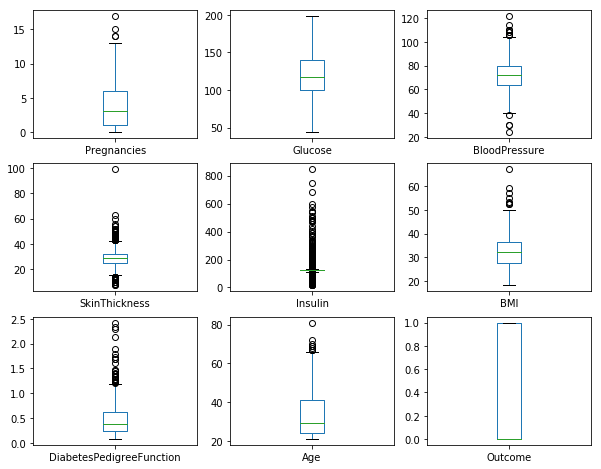

In [8]:
dataset.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [9]:
dataset_in_sd = dataset[dataset.apply(lambda x: np.abs(x - x.mean()) / x.std() <= 3).all(axis=1)]
dataset_out_sd = dataset.loc[dataset.index.difference(dataset_in_sd.index)]

In [10]:
print(dataset_in_sd.groupby("Outcome").size(), dataset_out_sd.groupby("Outcome").size())

Outcome
0    476
1    242
dtype: int64 Outcome
0    24
1    26
dtype: int64


In [11]:
from helpers import CSVDatasetWriter, CSVDatasetReader

In [12]:
writer = CSVDatasetWriter(hdf5_path, dataset)
writer.close()
writer_in = CSVDatasetWriter(hdf5_in_sd_path, dataset_in_sd)
writer_in.close()
writer_out = CSVDatasetWriter(hdf5_out_sd_path, dataset_out_sd)
writer_out.close()

Rewrite the data in "datasets/diabetes/diabetes.h5".
Rewrite the data in "datasets/diabetes/diabetes_in.h5".
Rewrite the data in "datasets/diabetes/diabetes_out.h5".
